In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx

In [3]:
# Jacobian determinant
# I calculated the Jacobian by hand

theta, l1, l2 = sp.symbols('theta l1 l2')

J = sp.Matrix([[sp.cos(theta)**2, sp.sin(theta)**2, sp.cos(theta)*sp.sin(theta)],
               [sp.sin(theta)**2, sp.cos(theta)**2, - sp.cos(theta)*sp.sin(theta)],
               [2*sp.sin(theta)*sp.cos(theta)*(l2 - l1), 2*sp.sin(theta)*sp.cos(theta)*(l1 - l2), sp.cos(theta)**2*(l1- l2) + sp.sin(theta)**2*(l2-l1)]])

dete = J.det()
print(dete)

expression = l1*sp.sin(theta)**6 + 3*l1*sp.sin(theta)**4*sp.cos(theta)**2 + 3*l1*sp.sin(theta)**2*sp.cos(theta)**4 + l1*sp.cos(theta)**6 - l2*sp.sin(theta)**6 - 3*l2*sp.sin(theta)**4*sp.cos(theta)**2 - 3*l2*sp.sin(theta)**2*sp.cos(theta)**4 - l2*sp.cos(theta)**6

simplified_expression = sp.simplify(expression)
print(simplified_expression)


l1*sin(theta)**6 + 3*l1*sin(theta)**4*cos(theta)**2 + 3*l1*sin(theta)**2*cos(theta)**4 + l1*cos(theta)**6 - l2*sin(theta)**6 - 3*l2*sin(theta)**4*cos(theta)**2 - 3*l2*sin(theta)**2*cos(theta)**4 - l2*cos(theta)**6
l1 - l2


C:\Users\USAID\AppData\Local\Temp\ipykernel_14304\69951945.py:4: RuntimeWarning: divide by zero encountered in log
  return 0.5 * (lambda1**2 + lambda2**2) - np.log(np.abs(lambda1 - lambda2))
c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


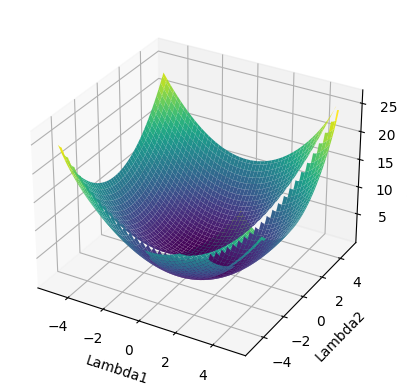

In [4]:
# 3D plotting the Hamiltonian

def hamiltonian(lambda1, lambda2):
    return 0.5 * (lambda1**2 + lambda2**2) - np.log(np.abs(lambda1 - lambda2))  

lambda1 = np.linspace(-5, 5, 100)
lambda2 = np.linspace(-5, 5, 100)

lambda1, lambda2 = np.meshgrid(lambda1, lambda2)

H = hamiltonian(lambda1, lambda2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(lambda1, lambda2, H, cmap='viridis')

ax.set_xlabel('Lambda1')
ax.set_ylabel('Lambda2')
ax.set_zlabel('Hamiltonian')

plt.show()


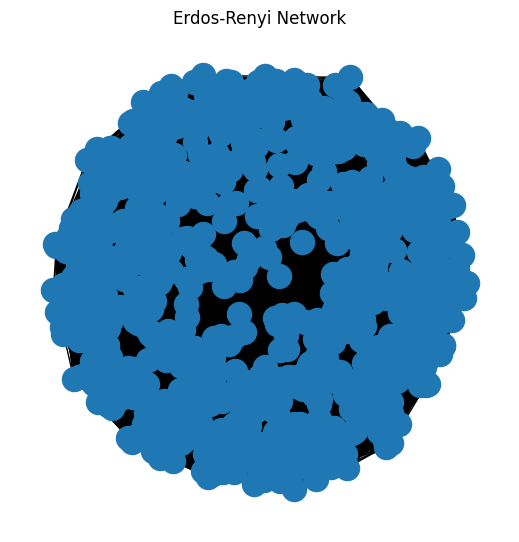

[ 0.00020176 -0.0261635   0.1018187 ]


C:\Users\USAID\AppData\Local\Temp\ipykernel_14304\30756324.py:57: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, np.sqrt(p), color = "r", label = "Wigner semi circle")


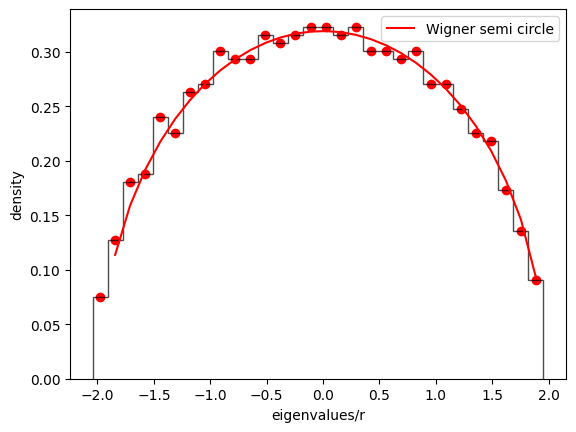

In [5]:
# Erdos-Renyi Network spectral density

N = 1000
p = 0.5

Egraph = nx.erdos_renyi_graph(N, p)

pos = nx.spring_layout(Egraph)
plt.figure(figsize=(5, 5))
nx.draw(Egraph, pos)
plt.title("Erdos-Renyi Network")
plt.show()

A = nx.adjacency_matrix(Egraph).toarray()

eigs = np.linalg.eigvals(A)
# r = 15.8113883 for N = 1000
eigs = eigs / 15.8113883
for i in eigs:
    if i > 30 or i < -30:
        eigs = np.delete(eigs, np.where(eigs == i))

y_values, bin_edges, _ = plt.hist(eigs, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', histtype="step")

x_values = (bin_edges[1:] + bin_edges[:-1]) / 2

x = x_values
y = y_values**2
order = 2
n = len(x) 
v = np.zeros((n, order+1))

for i in range(n):
    row = []
    for j in range(order+1):
        row.append(x[i]**2)
    v[i] = row

exp = []
for i in range(order, -1, -1):
    exp.append(i)

v = v ** exp

v_new = np.transpose(v) @ v

y_matrix = np.transpose(v) @ y

coef_matrix = np.linalg.solve(v_new, y_matrix)

p = 0
for i in range(order):
    p += coef_matrix[len(coef_matrix) - (i+1)]* x**(2*i)
print(coef_matrix)
plt.plot(x, np.sqrt(p), color = "r", label = "Wigner semi circle")
plt.legend()
plt.scatter(x,np.sqrt(y), color = "r")
plt.ylabel("density")
plt.xlabel("eigenvalues/r")
plt.show()


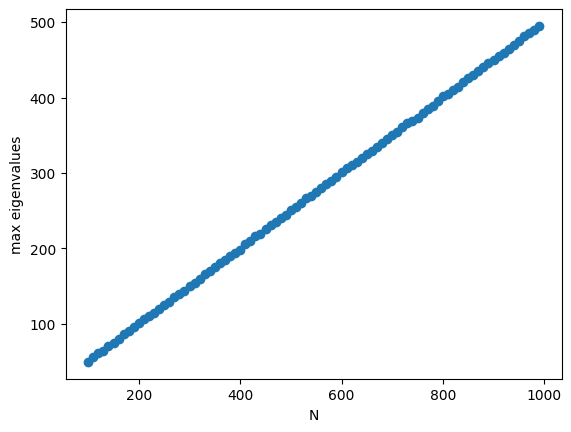

[49.586294384293026, 55.64054677060265, 60.791290963670775, 64.51153581922196, 70.78684623342848, 74.4182563790142, 79.90614447990536, 85.96686338421786, 90.65857118414229, 95.25140175611733, 101.50488023305303, 106.14008650050965, 110.79329820403686, 114.08377199100013, 120.10089930982816, 125.16322067067082, 129.56221565400088, 135.9145366214625, 139.59936785938388, 144.11045447059666, 150.00860984733401, 154.39917061183803, 159.64898451464833, 165.53924206031937, 170.23054185153893, 175.80764999694605, 180.52967565694732, 184.962237334959, 190.45408485970745, 193.77344742088673, 198.51292841296302, 205.23493422672541, 209.41337801266212, 215.95673462482438, 219.00107514005887, 225.56627473816496, 230.5285536097689, 235.54508601721298, 240.95243305333673, 244.81321431872072, 250.4173751932107, 255.05384512940665, 260.24186504358755, 266.2650716405596, 269.1375504912837, 275.3408455375009, 280.55475066101644, 285.78683624036864, 289.33519018769687, 295.29164530612746, 300.840518821809

In [23]:

N_vals = np.arange(100, 1000, 10)
p = 0.5
max_eig = []


for N in N_vals:
    Egraph = nx.erdos_renyi_graph(N, p)
    A = nx.adjacency_matrix(Egraph).toarray()
    eigs = np.linalg.eigvals(A)
    max_eig.append(np.max(eigs))



plt.scatter(N_vals, max_eig)
plt.ylabel("max eigenvalues")
plt.xlabel("N")
plt.show()
print(max_eig)

